In [1]:
import subprocess

input_file = "Sequence.fasta"
output_file = "out.fasta"

muscle_command = ["D:\\bin\muscle.exe", "-align", input_file, "-output", output_file]

process = subprocess.Popen(muscle_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

stdout, stderr = process.communicate()

print(stdout.decode())
print(stderr.decode())



muscle 5.1.win64 [ddb630]  8.4Gb RAM, 4 cores
Built Jan 13 2022 15:30:12
(C) Copyright 2004-2021 Robert C. Edgar.
https://drive5.com

Input: 529 seqs, avg length 9, max 9

00:00 16Mb   CPU has 4 cores, running 4 threads
00:01 412Mb   100.0% Calc posteriors  
00:47 808Mb   100.0% Consistency (1/2)  
01:31 808Mb   100.0% Consistency (2/2)  
01:31 810Mb   100.0% UPGMA5           
01:41 813Mb   100.0% Refining



In [2]:
from Bio import AlignIO
alignment = AlignIO.read("out.fasta", "fasta")

In [3]:
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor(calculator, "upgma")
tree = constructor.build_tree(alignment)

Phylo.write(tree, "tree.nwk", "newick")

Phylo.draw_ascii(tree)

  __________ 149.8|W128|Intermediate
 |
 |                                  __ 172.6|W030|Indica
 |                                ,|
 |                                ||  , 163.8|W049|Aus
 |                                ||__|
 |                              __|   | 150.0|W134|Aus
 |                             |  |
 |                             |  |   , 160.0|W256|VI/Aromatic
 |                             |  |___|
 |                             |      | 130.2|W081|VI/Aromatic
 |                             |
 |                             |   _ 164.2|W028|Aus
 |                             |  |
 |                             |  | , 149.0|W099|Aus
 |                             |  | |
 |                             |  | | 150.2|W287|Aus
 |                             |  | |
 |                           __|  | | 153.4|W115|Aus
 |                          |  |  | |
 |                          |  |  | | 155.0|W076|Aus
 |                          |  |  | |
 |                          |

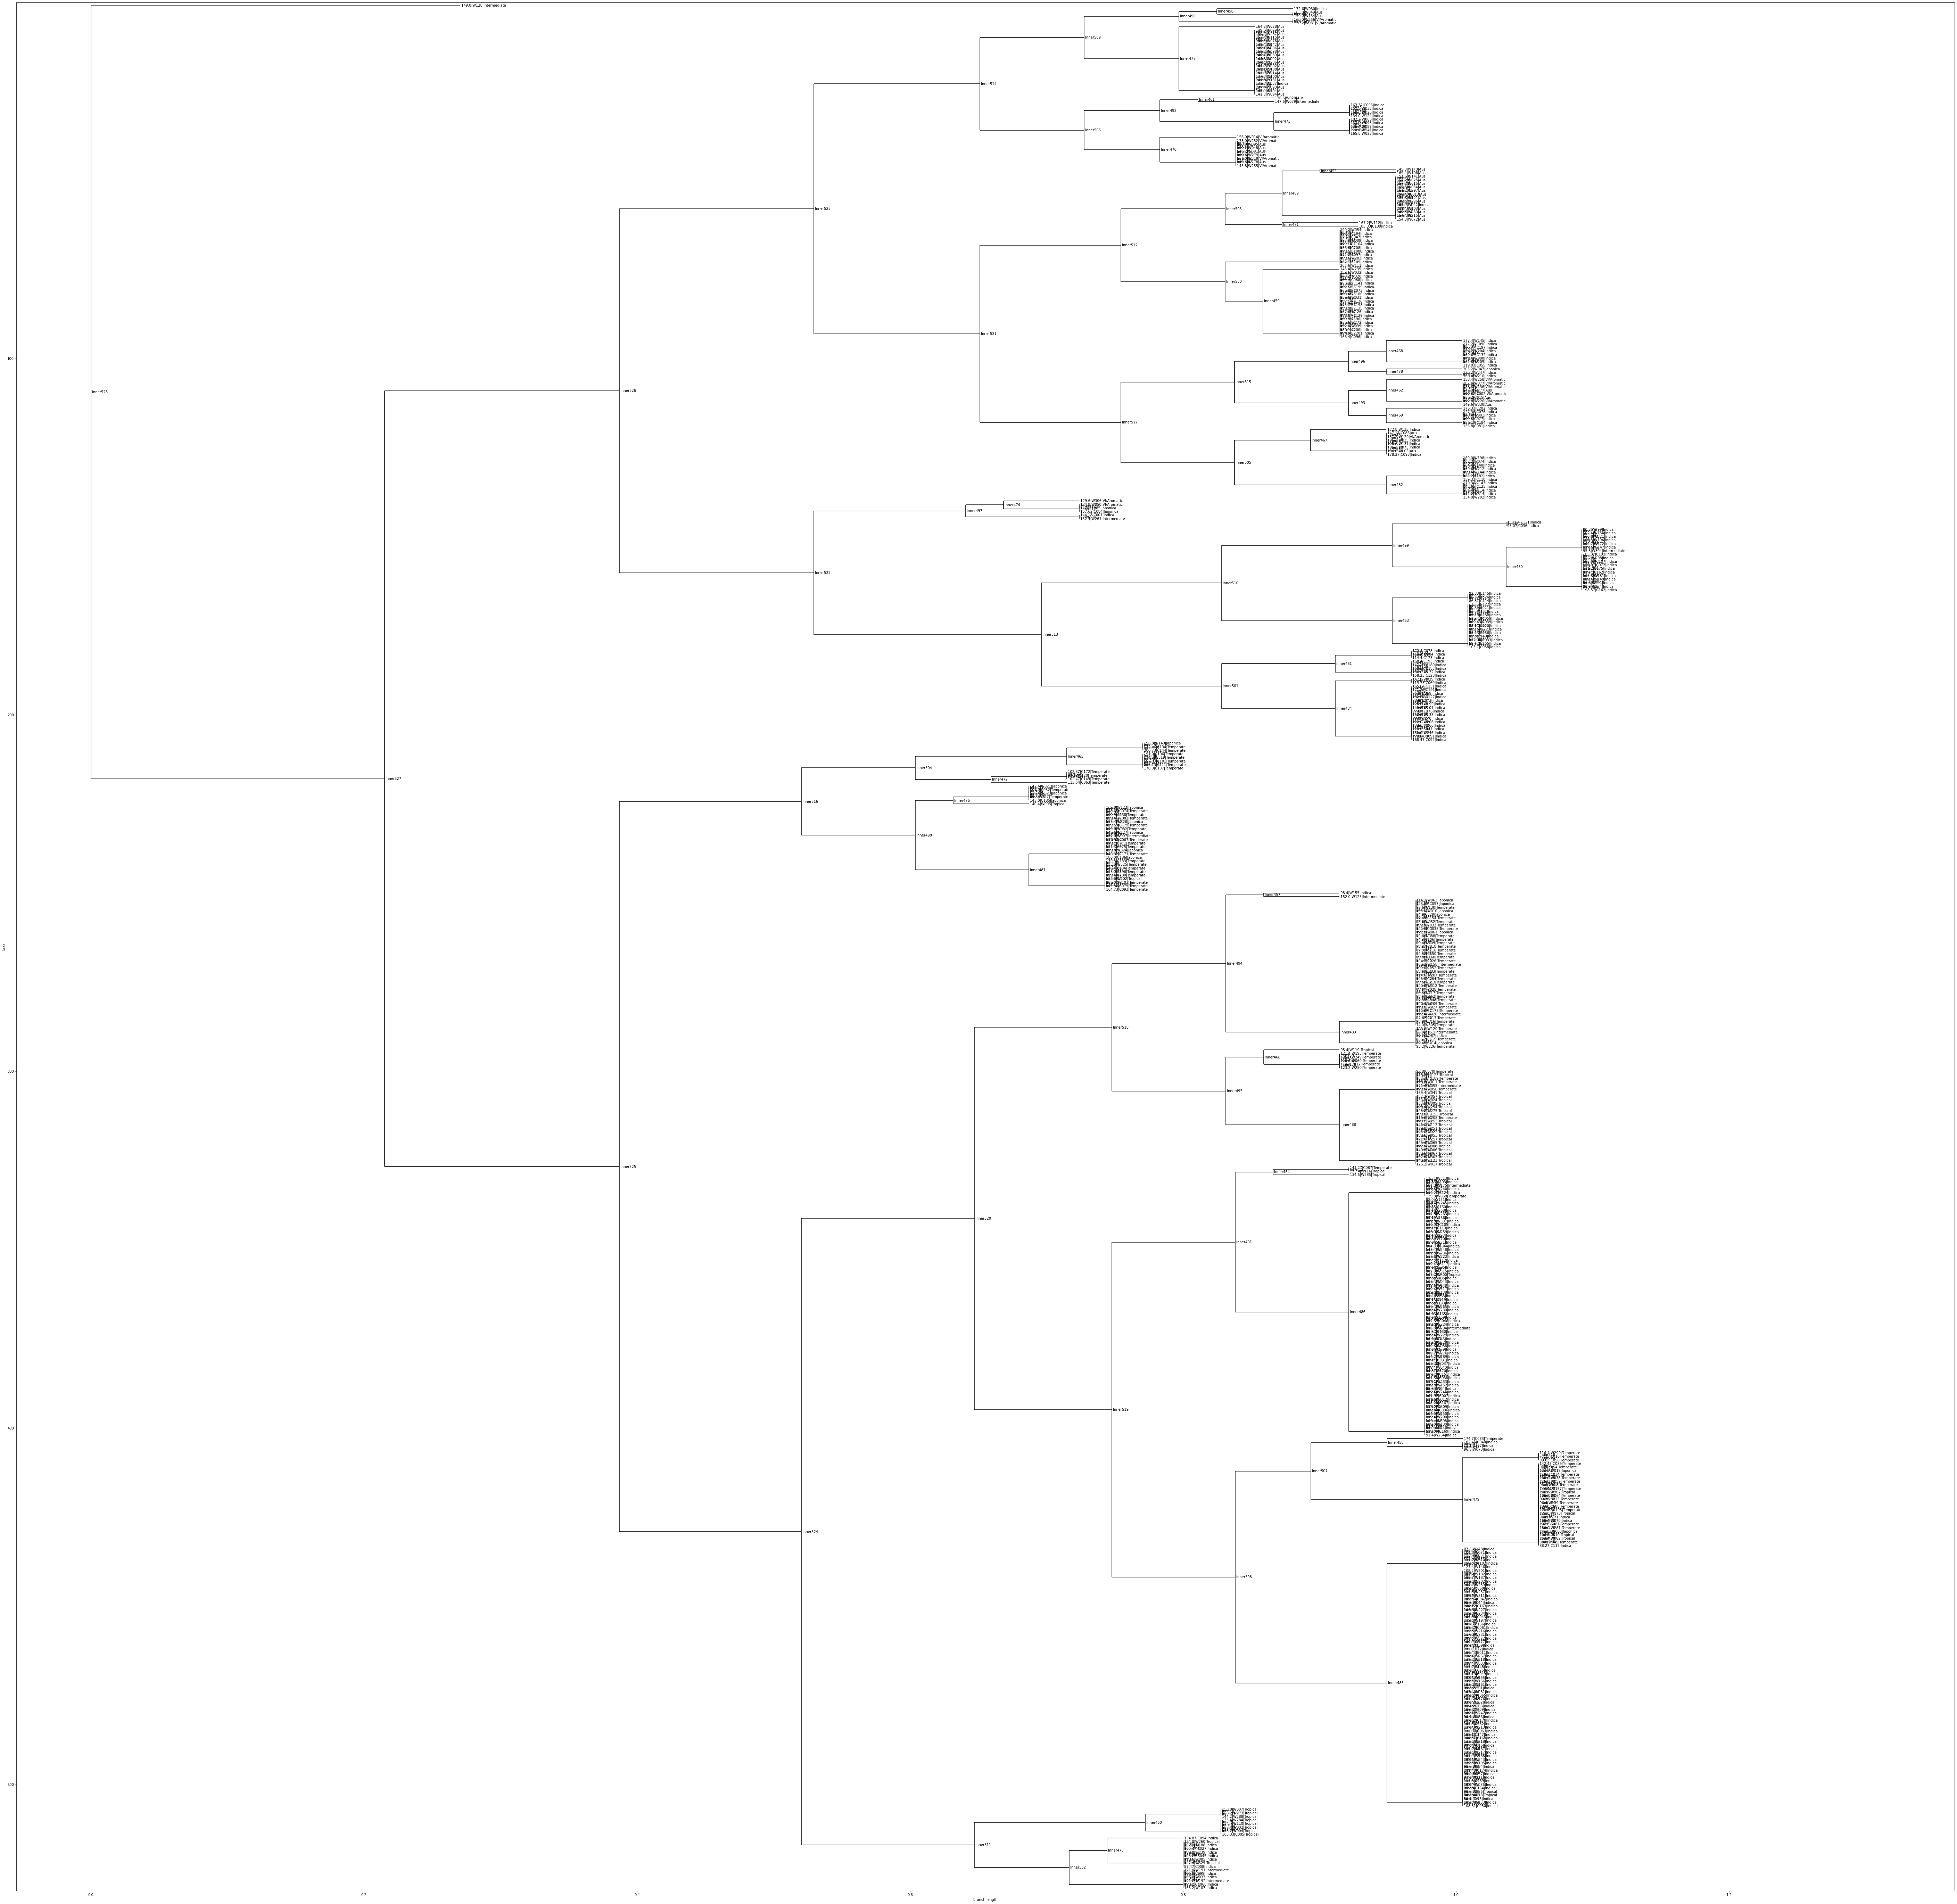

In [4]:
import matplotlib.pyplot as plt
from Bio import Phylo
fig, ax = plt.subplots(figsize = (100, 100))
Phylo.draw(tree, axes = ax)